# Exercise 9 - Working with Normal Distributions

Notebook Written By: WDY (Yale-NUS '24) (Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

For today’s activity, we will use the cleaned and anonymized survey data to find out more about the distributions of some of the quantitative indicators that we collected through the survey and that describe you (QR students).

The overarching question in today’s activity is: How “Normal” are QR students?

Let us start by importing survey.csv as a data frame survey into R. Let us then examine the data:

In [1]:
survey <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Part I - Working with Normal Distributions/survey.csv")

In [2]:
head(survey)

X,gender,nationality,height,phone,facebook,youtube,shoe,postcode,boxoffice
1,Female,Singaporean,164,42,NA,89000,37.0,1,79097104
2,"Neither, both, it depends, something else, or prefer not to say",Non-Singaporean,178,63,7,45000,28.7,NA,257620288
3,Female,Singaporean,170,22,27,1100000,25.4,1,28815245
4,Female,Non-Singaporean,167,94,33,244153,39.0,NA,61459425
5,Female,Non-Singaporean,163,41,185,178667673,39.0,NA,355467056
6,Female,Non-Singaporean,160,60,10,6370000,23.9,4,199


To recall, you were asked to report the following information:

- Categorical Indicators

    - gender: Your gender identity (Female / Male / Neither, both, it depends, something else, etc.)
    - nationality: Your nationality (Singaporean / Non-Singaporean / Other or prefer not to say)

- Quantitative Indicators

    - height: Your height (measured in centimetres)
    - phone: The last two digits of your Singapore hand phone number
    - youtube: The number of views on the video on Youtube that you most recently watched

### Step 1: Plot the histogram of QR student heights
- Set bar width equal to 5 (centimetres)
- Add an appropriate label to the x-axis and an informative title

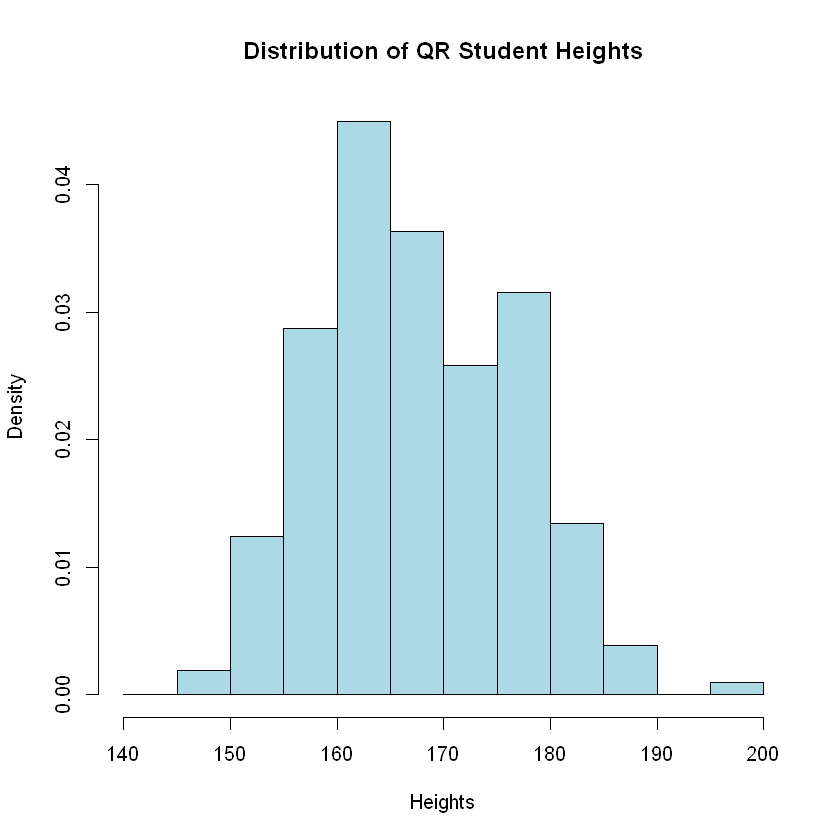

In [8]:
# PLOT THE HISTOGRAM OF QR STUDENT HEIGHTS
hist(survey$height,
    xlab = "Heights",
    breaks = c(seq(140, 200, 5)),
    freq = FALSE,
    main = "Distribution of QR Student Heights",
    col = "lightblue")

### Step 2: Add a normal curve to the histogram to help make a visual comparison (hint: try using curve and dnorm)

In [9]:
# FIND MEAN AND SD FOR THE CURVE
mean(survey$height, na.rm = TRUE)

sd(survey$height, na.rm = TRUE)

[1] 168.3246

[1] 9.091498

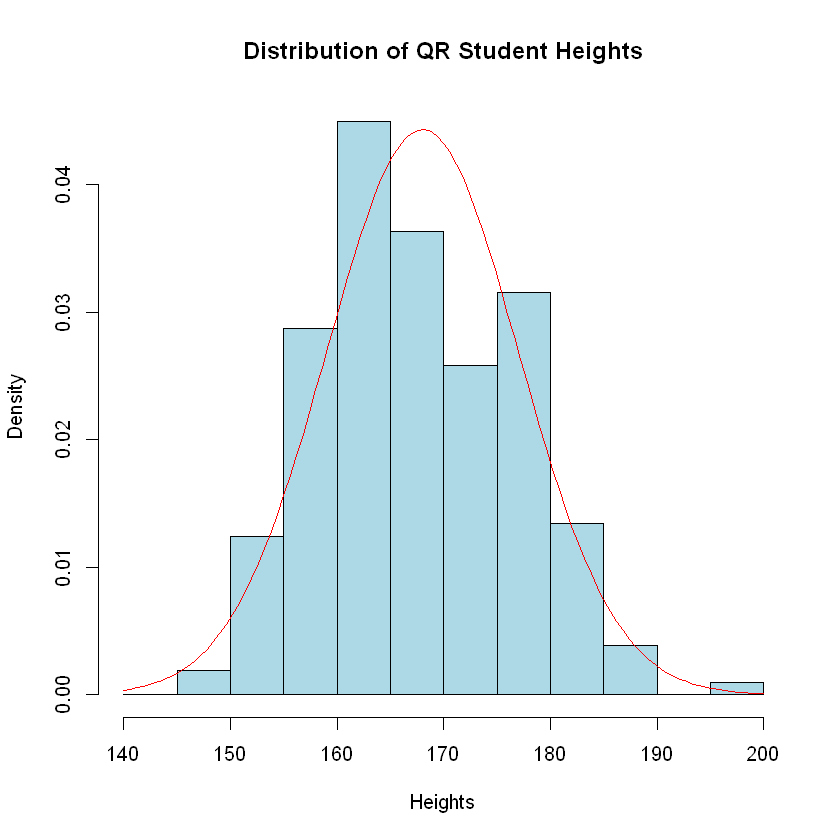

In [11]:
# PLOT THE HISTOGRAM OF QR STUDENT HEIGHTS
hist(survey$height,
    xlab = "Heights",
    breaks = c(seq(140, 200, 5)),
    freq = FALSE,
    main = "Distribution of QR Student Heights",
    col = "lightblue")

# ADD NORMAL CURVE TO HISTOGRAM
curve(dnorm(x, mean = 168, sd = 9),
     from = 140,
     to = 200, 
     col = "red",
     add = TRUE)

### Step 3: - Plot the qqplot + qqline
- What do you find based on the histogram and qqplot? Is it close to normal?

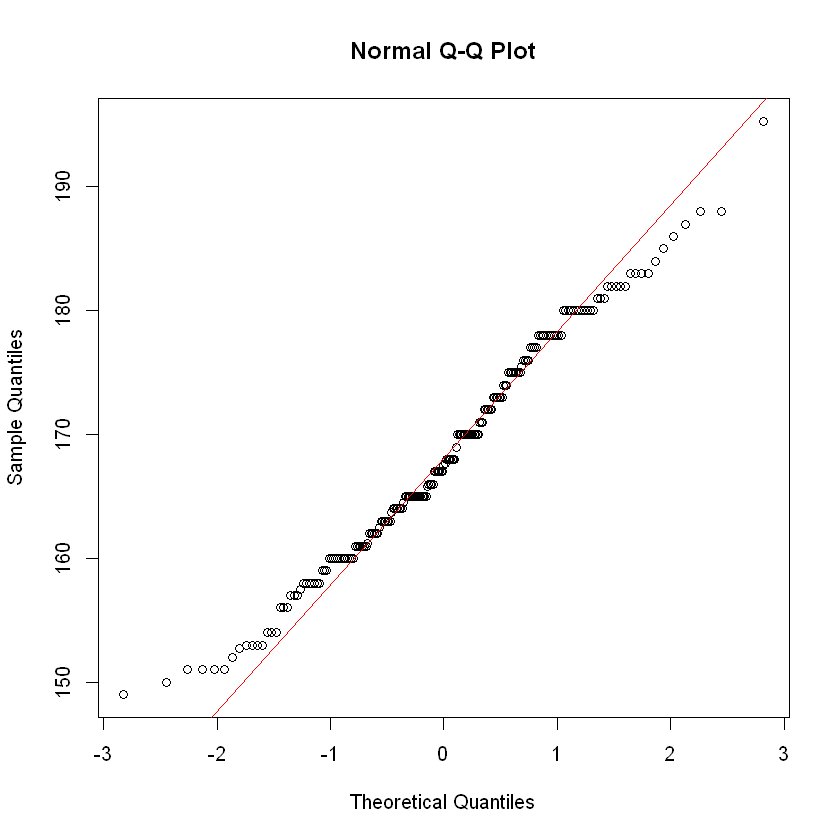

In [12]:
# PLOT THE QQ PLOTS
qqnorm(survey$height)

qqline(survey$height, col = "red")

Based on the Histogram + Curve and the QQ Plot, it seems like the distribution is not all that normal.

- The histogram indicates the distribution is bimodal rather than unimodal
- The theoretical quantiles of the QQ plot deviates suspiciously from the QQ line (i.e. the tails on the distribution are a bit too thin for a normal distribution)

Why might this be? What do you think could be happening?

### Step 4: Find mean and SD of height by gender to find patterns

In [15]:
# MEAN OF FEMALES
female_mean <- mean(survey$height[survey$gender == "Female"], na.rm = TRUE)

# SD OF FEMALES
female_sd <- sd(survey$height[survey$gender == "Female"], na.rm = TRUE)

# MEAN OF MALES
male_mean <- mean(survey$height[survey$gender == "Male"], na.rm = TRUE)

# SD OF MALES
male_sd <- sd(survey$height[survey$gender == "Male"], na.rm = TRUE)

### Step 5: Plot histograms of both females and male heights seperately

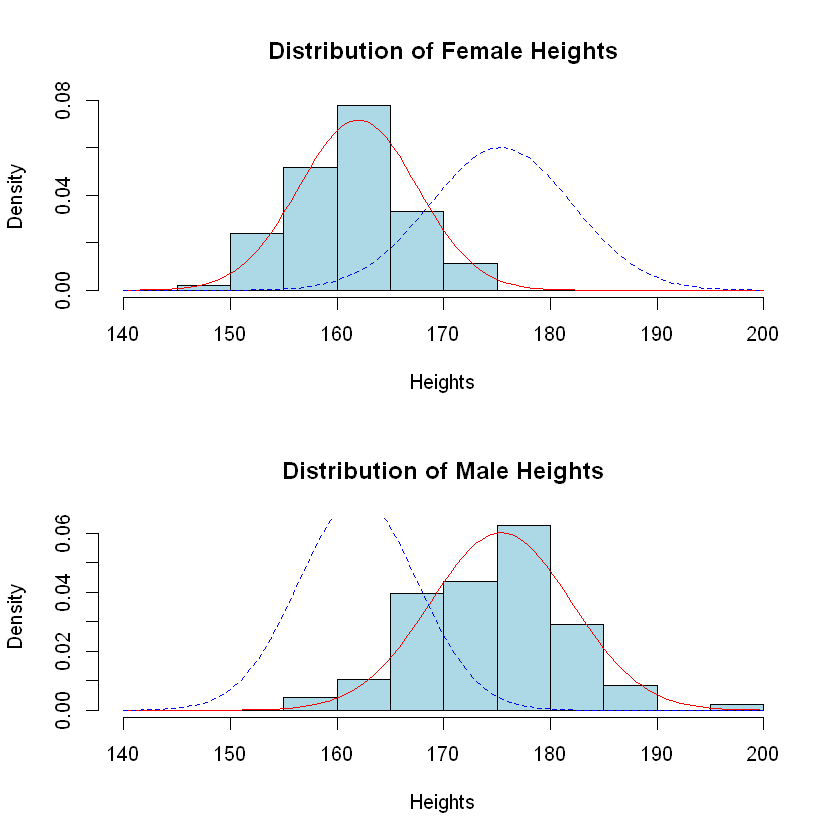

In [17]:
par(mfrow = c(2,1))

# PLOT FEMALE HISTOGRAM FIRST
hist(survey$height[survey$gender == "Female"],
    col = "lightblue",
    main = "Distribution of Female Heights",
    xlab = "Heights",
    freq = FALSE,
    breaks = c(seq(140, 200, 5)))

# PLOT A FEMALE NORMAL DISTRIBUTION CURVE VS A MALE DISTRIBUTION CURVE
curve(dnorm(x, mean = female_mean, sd = female_sd),
     col = "red",
     add = TRUE)

curve(dnorm(x, mean = male_mean, sd = male_sd),
     col = "blue",
     add = TRUE,
     lty = 2)


# PLOT MALE HISTOGRAM NEXT
hist(survey$height[survey$gender == "Male"],
    col = "lightblue",
    main = "Distribution of Male Heights",
    xlab = "Heights",
    freq = FALSE,
    breaks = c(seq(140, 200, 5)))

curve(dnorm(x, mean = male_mean, sd = male_sd),
     col = "red",
     add = TRUE)

curve(dnorm(x, mean = female_mean, sd = female_sd),
     col = "blue",
     add = TRUE,
     lty = 2)

### Step 6: Find the normal distribution of the two plots

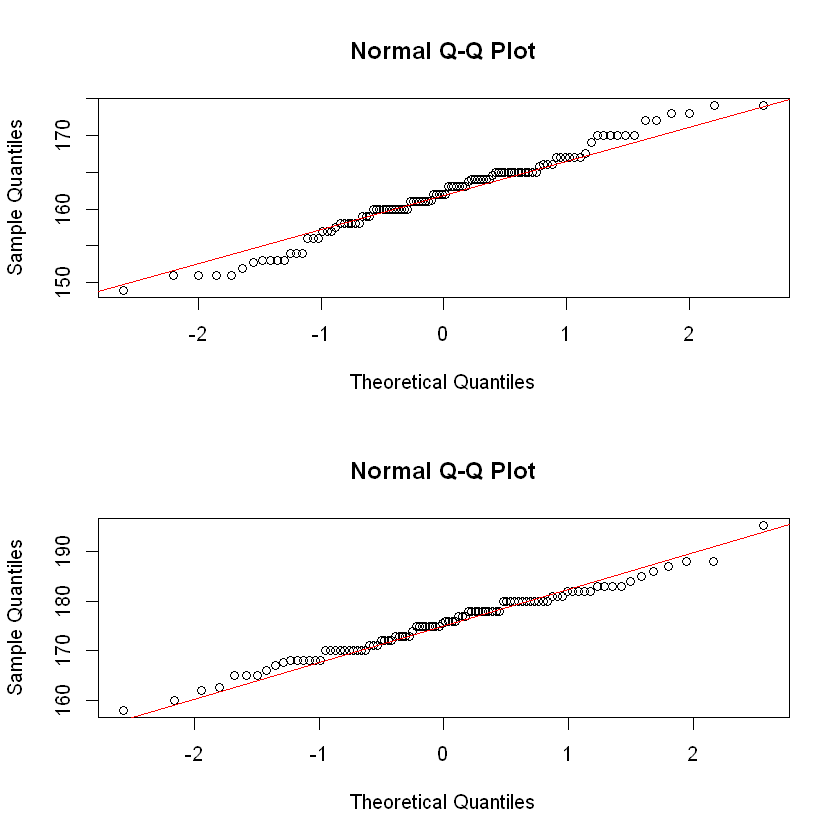

In [19]:
par(mfrow = c(2,1))

# FIND THE NORMAL DISTRIBUTION OF THE QQ PLOT FOR FEMALES
qqnorm(survey$height[survey$gender == "Female"])
qqline(survey$height[survey$gender == "Female"], col = "red")

# FIND THE NORMAL DISTRIBUTION OF THE QQ PLOT FOR MALES
qqnorm(survey$height[survey$gender == "Male"])
qqline(survey$height[survey$gender == "Male"], col = "red")

### Step 7: Plot the histogram of the last two digits of your Singapore hand phone numbers
- Set bar width = 10 ranging from 0 to 100
- Add an appropriate label to the x-axis and an informative title

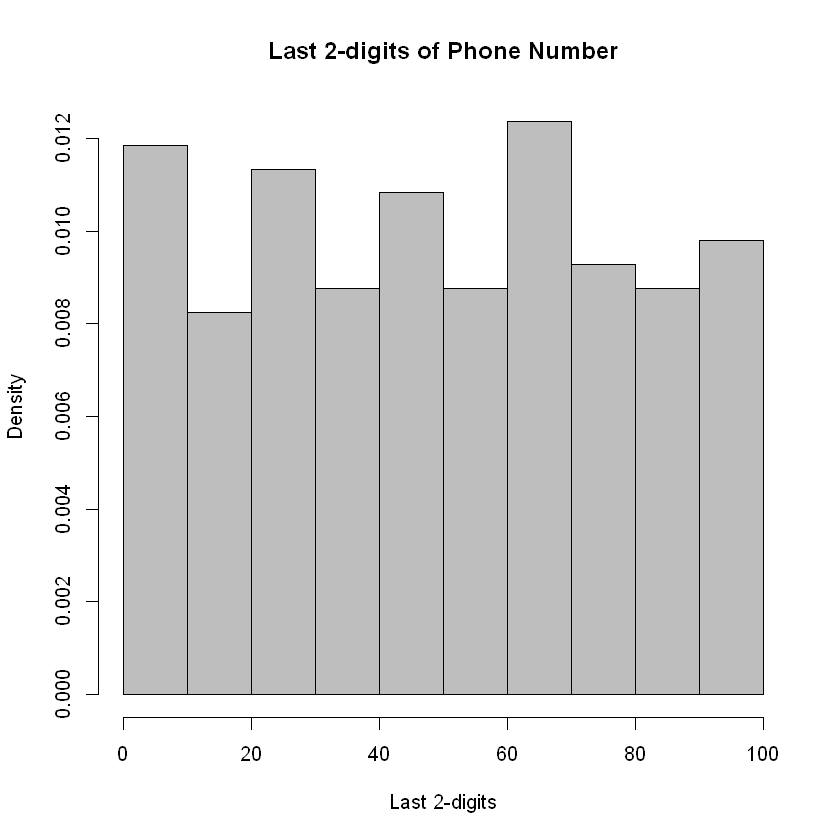

In [21]:
hist(survey$phone, 
     main="Last 2-digits of Phone Number", 
     xlab="Last 2-digits", 
     breaks=c(seq(0,100,10)), 
     col="gray", 
     freq=FALSE)

### Step 8: Plot the QQ plot + QQ line of the earlier plot
What do you find? Is it close to normal?

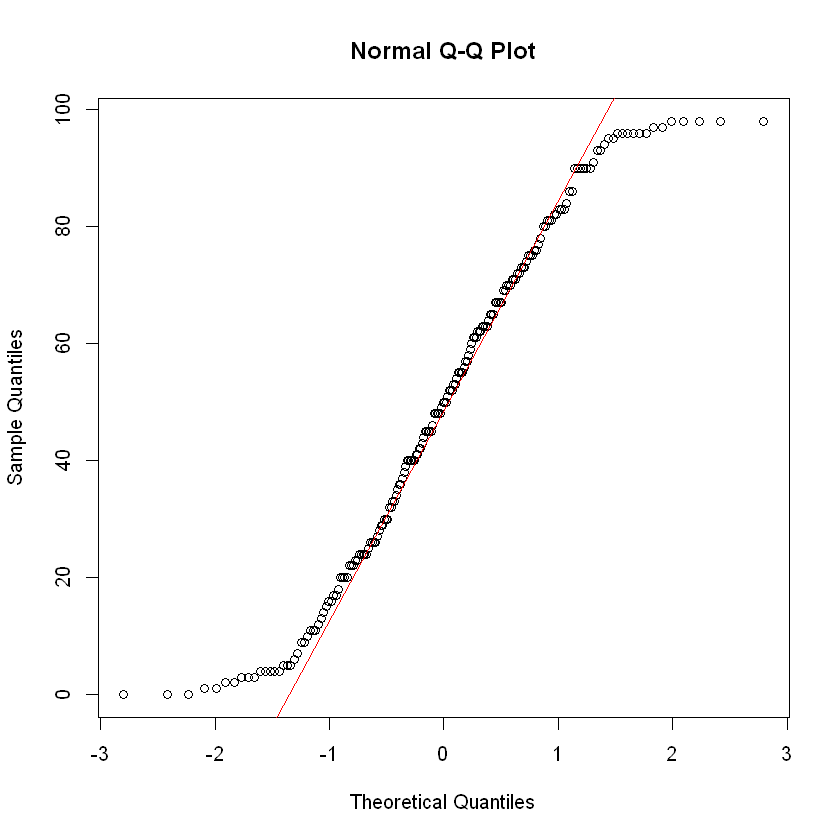

In [22]:
qqnorm(survey$phone)
qqline(survey$phone, col="red")

### Step 9: Plot the histogram of Youtube views
- Add an appropriate label to the x-axis and an informative title
- Apply any transformations you think appropriate to help visualise


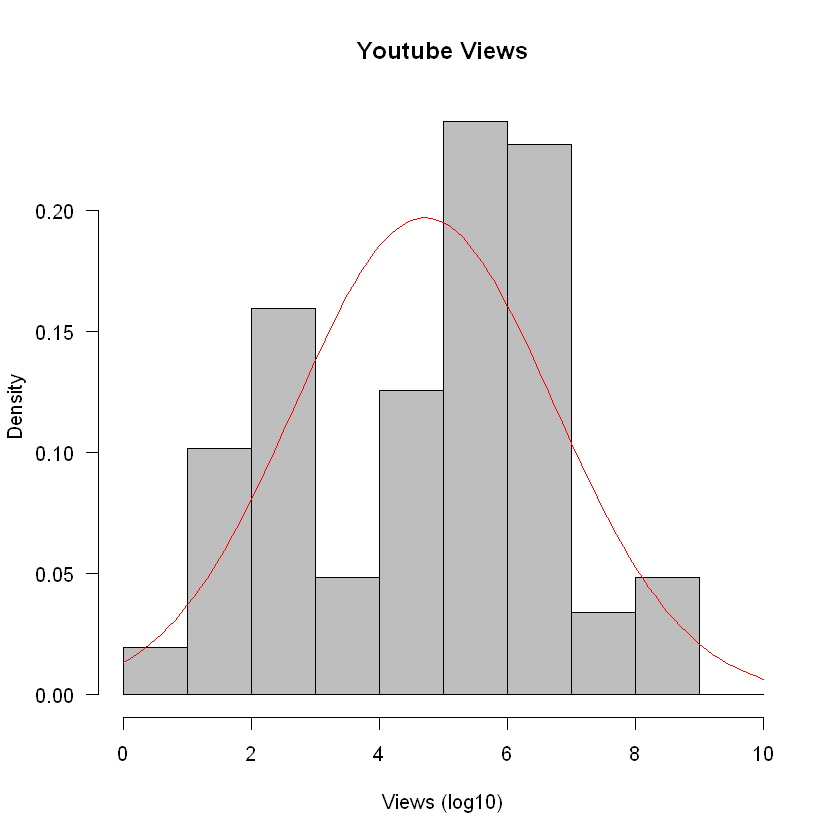

In [32]:
# LOG THE RESULTS BECAUSE OF THE PRESENCE OF SOME ZEROS
survey$log_youtube<-log10(survey$youtube+1)

hist(survey$log_youtube, 
     main="Youtube Views", 
     xlab="Views (log10)",
     col="gray", 
     las=1, 
     breaks=c(seq(0,10,1)), 
     freq=FALSE)

# FIND THE MEAN AND SD FOR THE CURVE
a<- mean(survey$log_youtube, na.rm=TRUE)
b <- sd(survey$log_youtube, na.rm=TRUE)


# DRAW OUT THE CURVE
curve(dnorm(x, mean = a, sd = b),
     from = 0,
     to = 10,
     add = TRUE,
     col = "red")

### Step 10: Plot the QQ plot + QQ line
- What do you find? Is it close to normal?

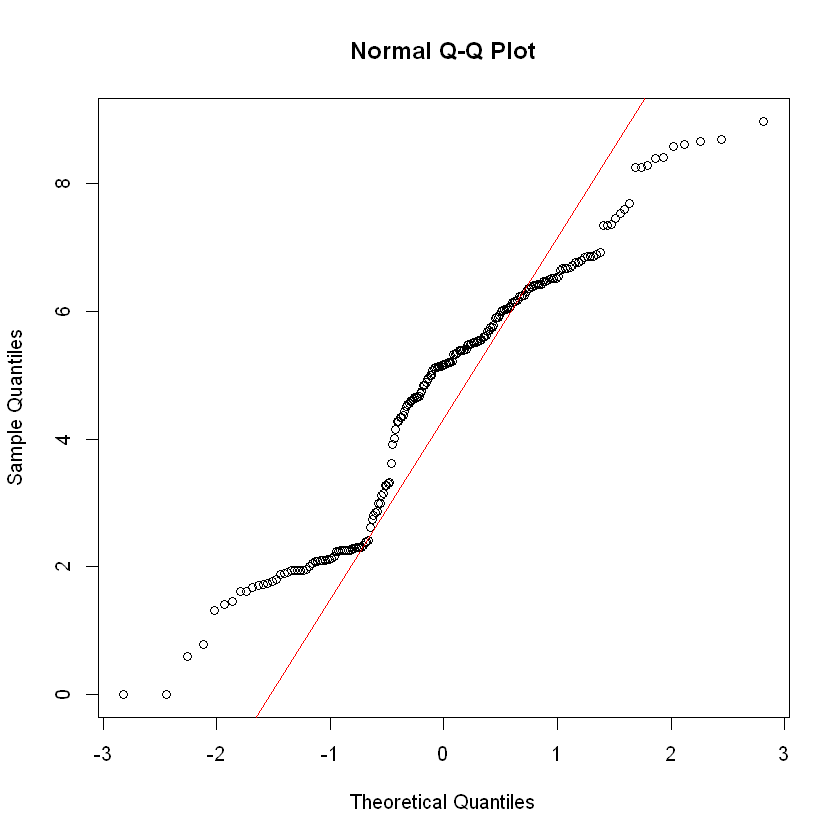

In [33]:
qqnorm(survey$log_youtube)
qqline(survey$log_youtube, col="red")

### Conclusion

Are the heights of QR students normally distributed?

    All Students: Not normally distributed, but...
    Female: Normally distributed with mean 162 and sd 5.6
    Male: Normally distributed with mean 175 and sd 6.6
Are the last two digit of the Singapore hand phone numbers of QR students normally distributed?

    Not normally distributed, closer to a uniformly distribution
Are the number of views on the videos that QR students most recently watched on Youtube normally distributed?

    Not normally distributed, skew to the right tail.
    But when we transform...still not normally distributed!

### Step 11: How “normal” is the distribution of Facebook reacts?

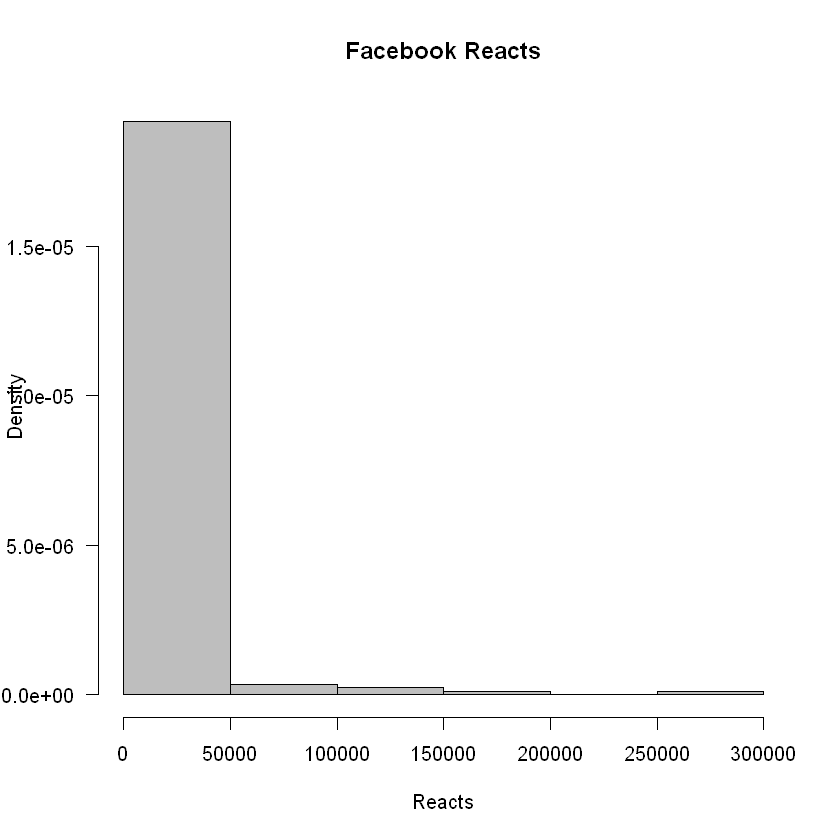

In [34]:
hist(survey$facebook, 
     main="Facebook Reacts", 
     xlab = "Reacts",
     las=1, 
     col="grey", 
     freq = FALSE)

In [35]:
survey$log_facebook<-log10(survey$facebook+1)

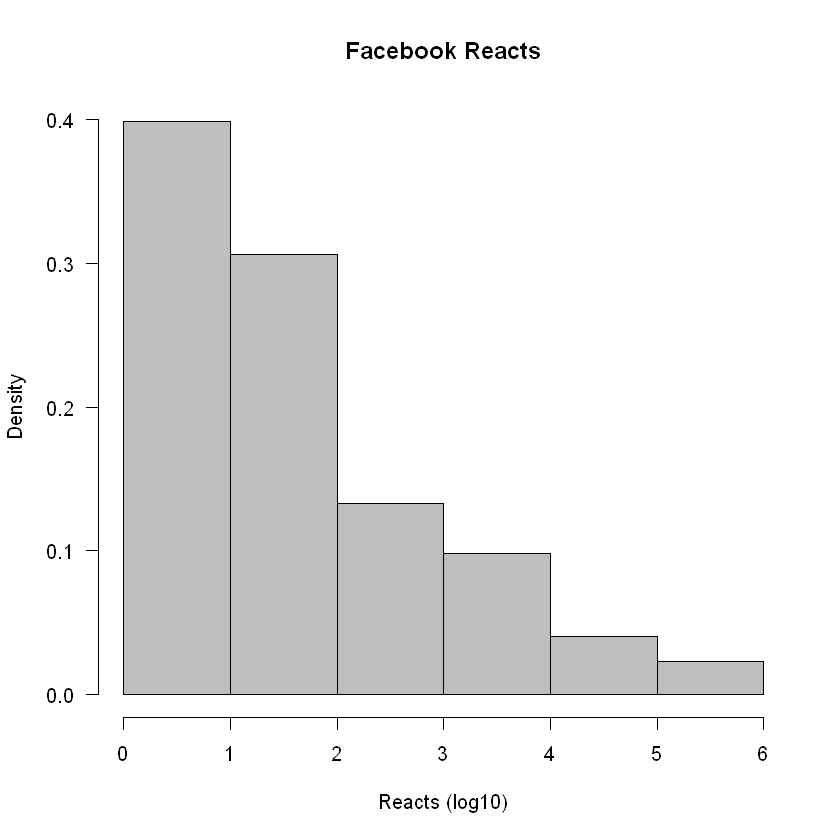

In [36]:
hist(survey$log_facebook, 
     main="Facebook Reacts", 
     xlab = "Reacts (log10)",
     las=1, 
     col="grey", 
     breaks=c(seq(0,6,1)), 
     freq = FALSE)

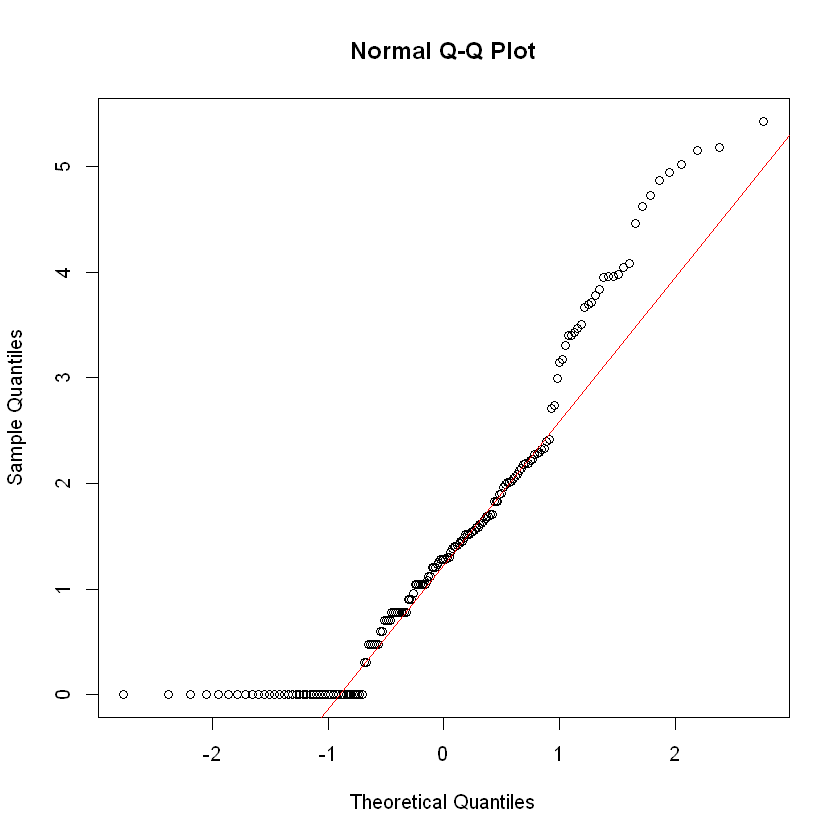

In [37]:
qqnorm(survey$log_facebook)
qqline(survey$log_facebook, col="red")

### Step 12: How “normal” are the shoe sizes of QR students in centimeters?

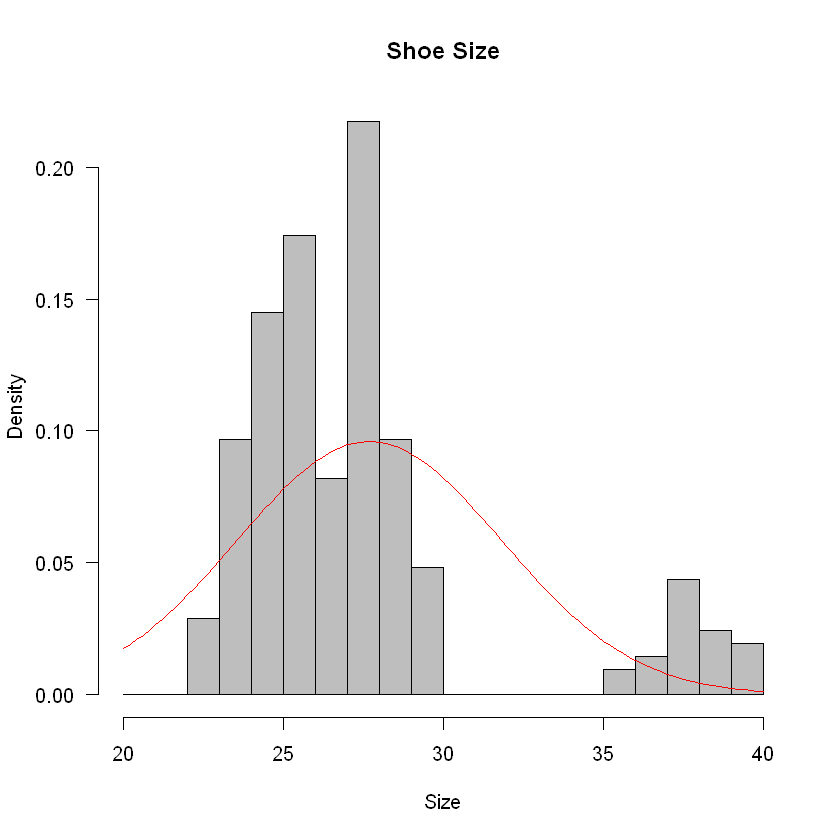

In [39]:
hist(survey$shoe, 
     main="Shoe Size", 
     xlab="Size",
     xlim=c(20,40), 
     las=1, 
     col="grey", 
     breaks=c(seq(20,40,1)), 
     freq = FALSE)

curve(dnorm(x, 
            mean = mean(survey$shoe, na.rm=TRUE), 
            sd = sd(survey$shoe, na.rm=TRUE)), 
      from = 20, 
      to = 40, 
      add = TRUE, 
      col = "red")

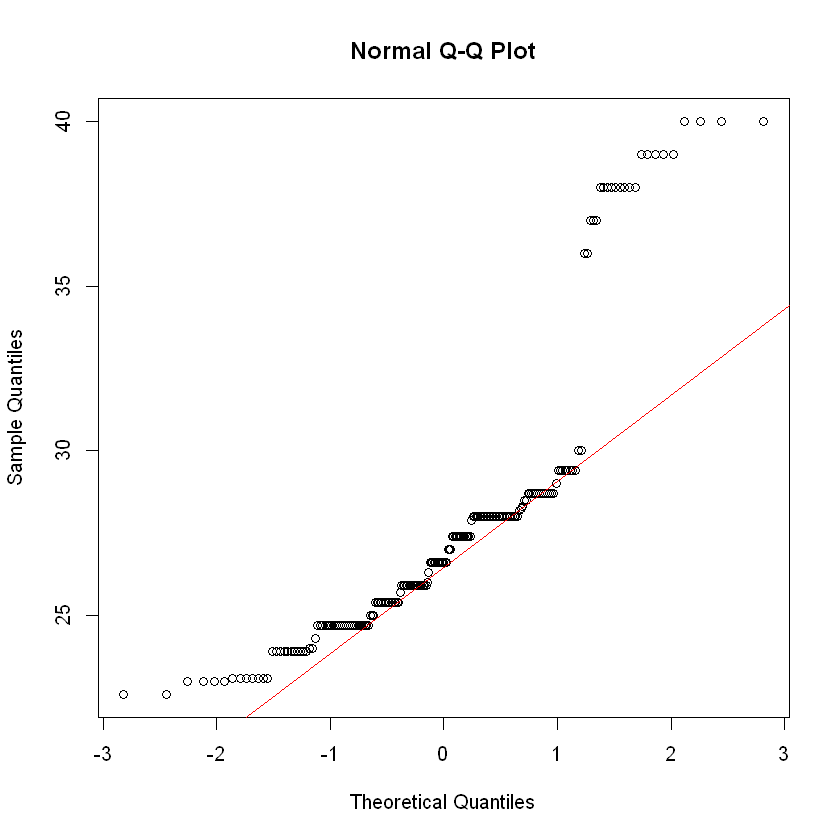

In [40]:
qqnorm(survey$shoe)
qqline(survey$shoe, col="red")

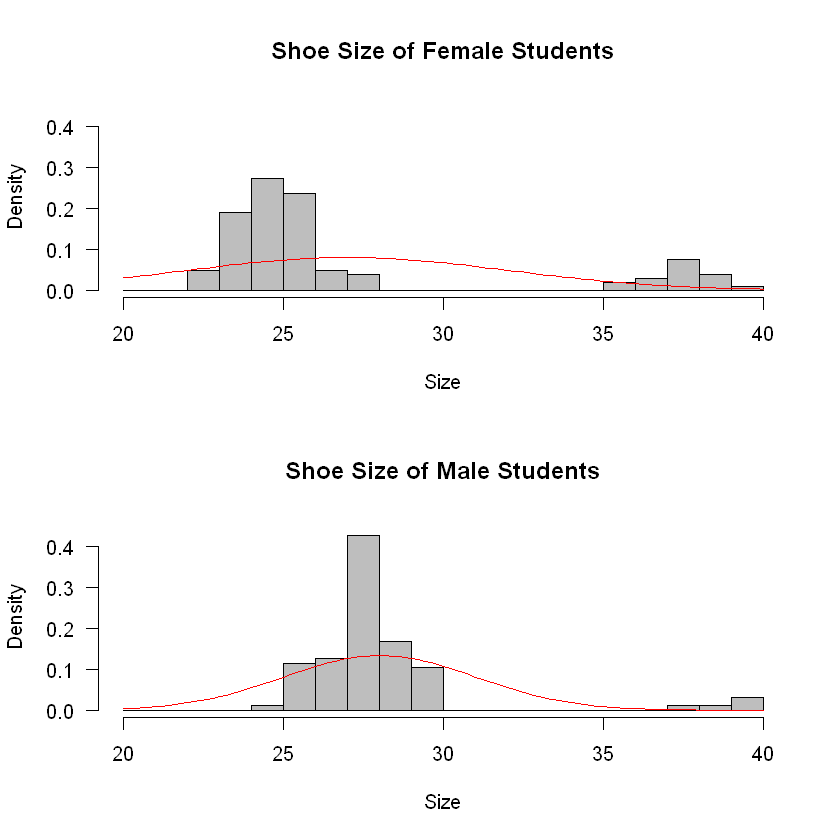

In [42]:
par(mfrow=c(2,1))
# FEMALE STUDENT SHOES
hist(survey$shoe[survey$gender=="Female"], 
     main="Shoe Size of Female Students", 
     xlab="Size",
     xlim=c(20,40), 
     ylim=c(0,0.45), 
     las=1, 
     col="gray", 
     breaks=c(seq(20,40,1)),
     freq = FALSE)

curve(dnorm(x, mean = 27, sd = 5),from = 20, to = 40, add = TRUE,col = "red")

# MALE STUDENT SHOES
hist(survey$shoe[survey$gender=="Male"], 
     main="Shoe Size of Male Students", 
     xlab="Size",
     xlim=c(20,40), 
     ylim=c(0,0.45), 
     las=1, 
     col="gray", 
     breaks=c(seq(20,40,1)),
     freq = FALSE)

curve(dnorm(x, mean = 28, sd = 3),from = 20, to = 40, add = TRUE,col = "red")

par(mfrow=c(1,1))

### Step 13: How “normal” are the last digits of the postal code of QR students’ permanent residence?

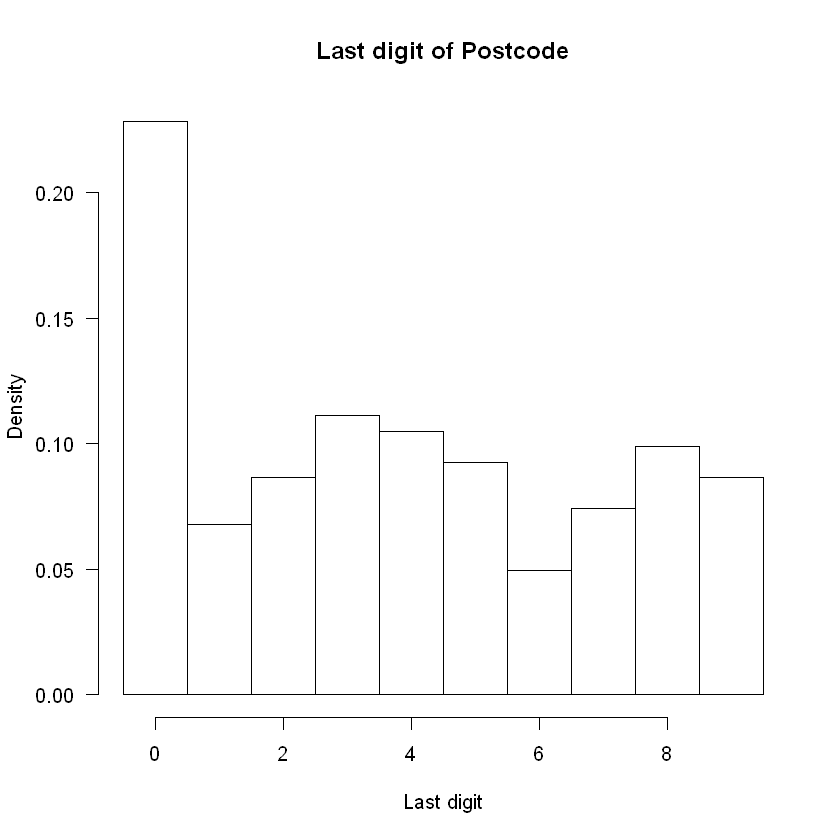

In [43]:
hist(survey$postcode, 
     main="Last digit of Postcode", 
     xlab="Last digit", 
     las=1, 
     breaks=c(seq(-0.5, 9.5, 1)), 
     freq = FALSE)

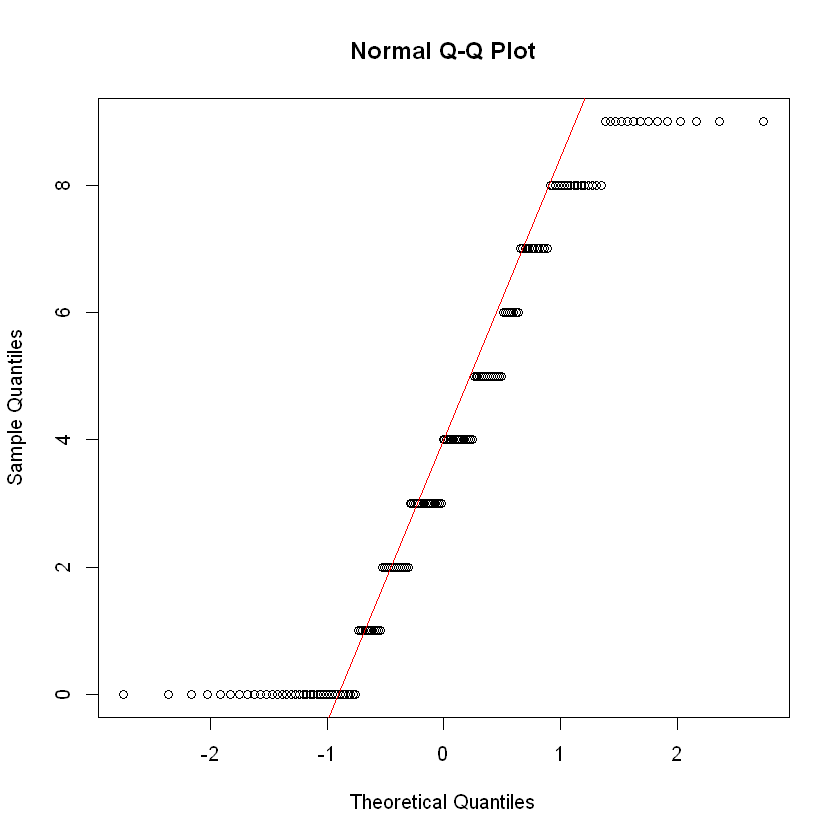

In [44]:
qqnorm(survey$postcode)
qqline(survey$postcode, col="red")

### Step 14: How “normal” are the total worldwide grosses of QR students’ favorite films?

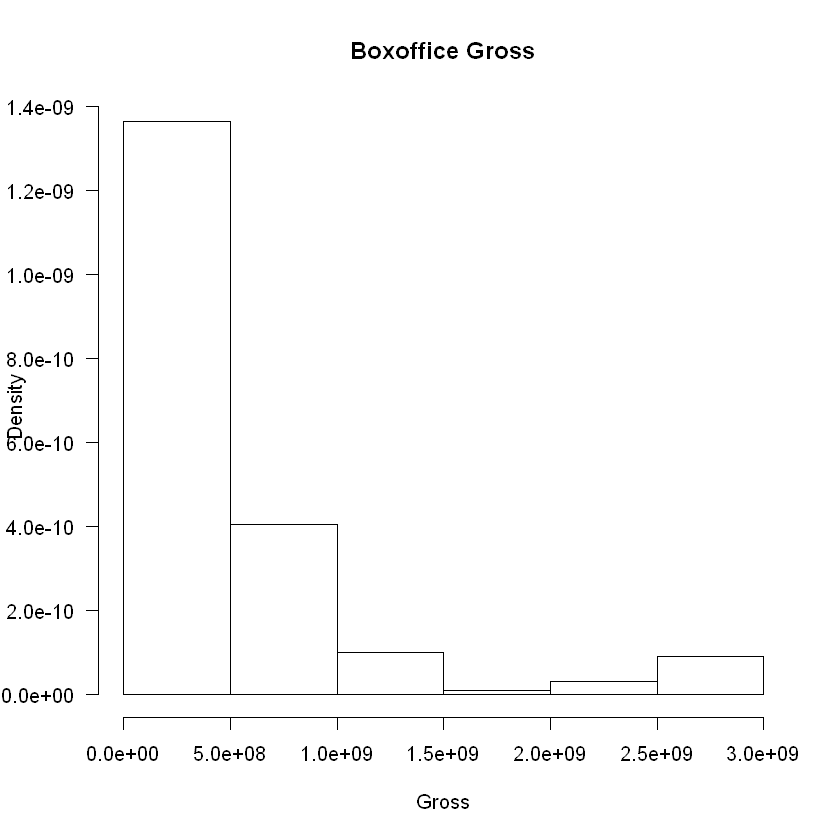

In [45]:
hist(survey$boxoffice, 
     main="Boxoffice Gross", 
     xlab="Gross",
     las=1, freq = FALSE)

In [46]:
survey$log_boxoffice<-log10(survey$boxoffice+1)

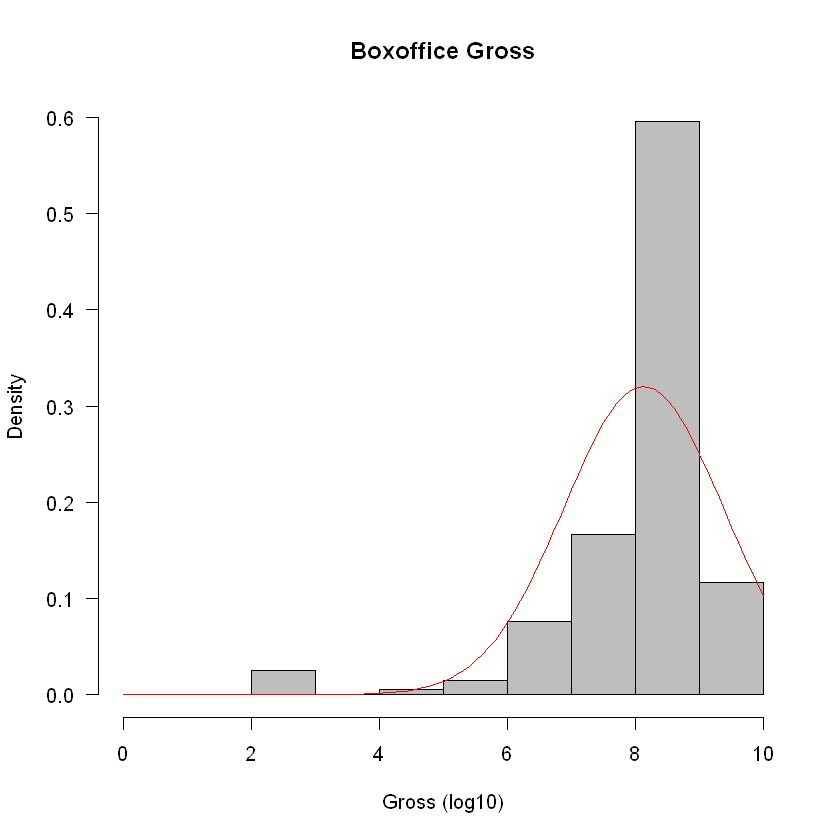

In [47]:
hist(survey$log_boxoffice, 
     main="Boxoffice Gross", 
     xlab="Gross (log10)",
     las=1, 
     col="grey", 
     breaks=c(seq(0,10,1)), 
     freq = FALSE)

curve(dnorm(x, 
            mean = mean(survey$log_boxoffice, na.rm=TRUE), 
            sd = sd(survey$log_boxoffice, na.rm=TRUE)), 
      from = 0, 
      to = 10, 
      add = TRUE,
      col = "red")

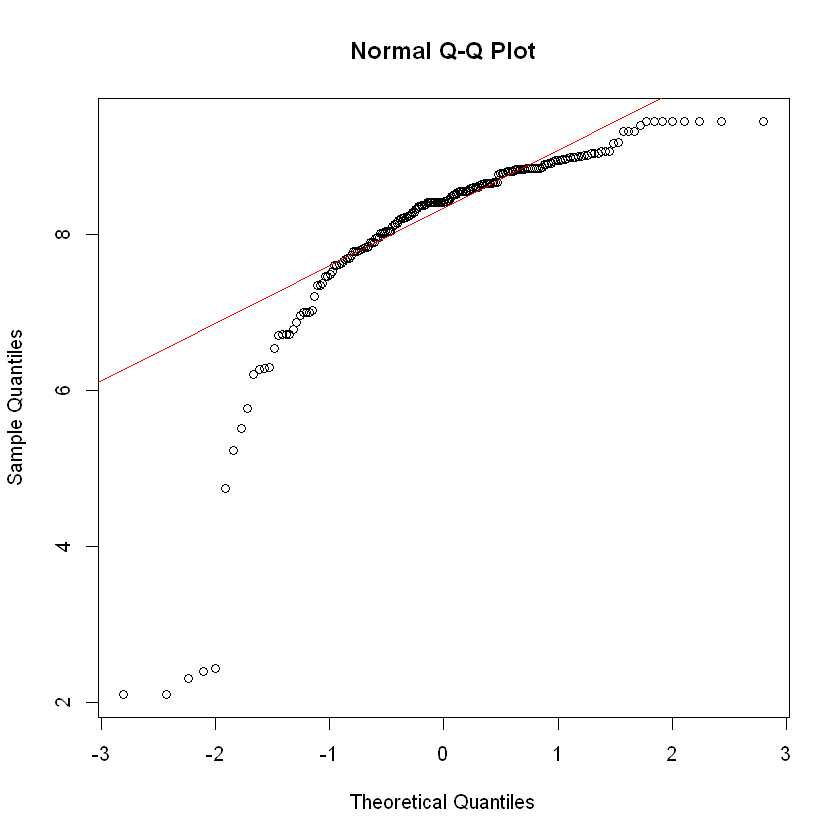

In [48]:
qqnorm(survey$log_boxoffice)
qqline(survey$log_boxoffice, col="red")